# Multilevel Feedback Queue scheduling (MLFQ) in CPU scheduling. 

#### Lecturer: 
Tran Van Hoai
#### Students:
Phan Minh Toan - 1852798

Tran Nhut Quang - 1852037

Trinh Minh Trung - 1852825


## 1. Introduction

In this assignment, Our group will demonstate a Multilevel Feedback Queue Scheduling in scheduling. The purpose of this assignment is to evaluate the performance of the scheduling related to CPU Utilization. 7 different mode will be carried out for comparison and evaluation. From such evaluation and comparison, conclusion for the CPU Utilization can be withdrawn from modes or each mode we generated.

## 2. Multilevel Feedback Queue scheduling (MLFQ)

Multilevel Feedback Queue is an upgrade of Multilevel queue in CPU scheduling. Multilevel Queue (MLQ) and Multilevel Feedback Queue (MLFQ) is used when processes in the ready queue can be arranged into different classes where each class have its own requirements of scheduling. The different between these two algorithms is that the MLFQ allows a process to move between queues. This function can help scheduler in separate the processes based on CPU – burst. For instance, if a process uses too much time on CPU, it will be moved to a lower-priority queue. In the other hands, if a process wait too long in lower-priority queue may be moved to a higher priority queue. This will prevent starvation.


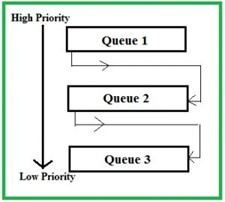

## 3.  Multilevel Feedback Queue Scheduler parameters:

A Multilevel Feedback Queue Scheduler can be defined by the following parameters:
* The number of queues.
* The scheduling algorithm for each queue.
* The method used to determine when to upgrade a process to a higher-priority queue.
* The method used to determine when to demote a process to a lower-priority queue.
* The method used to determine which queue a process will enter when that process needs service.
* The number of queues.

The definition of a multilevel feedback queue scheduler makes it the most general CPU-scheduling algorithm. However, there are some requirements for selecting values for all parameters to perform the best scheduler. 


## 4. Advantages and Disadvantages

The MLFQ brings us many benefits of scheduling:

* Flexibility.
* It allows different processes to move between different queues.
* It prevents starvation by moving a process that waits too long for the lower priority queue to the higher priority queue.

However, there exist some limitations. 

* For the selection of the best scheduler, it requires some other means to select the values.
* It produces more CPU overheads.
* It is the most complex algorithm.

## 5. Steps in Performance Evaluation Project

### 5.1. Stating Goals and Defining the system

Goals of CPU Scheduling with Multilevel Feedback Queue:

* To estimate completion time, response time, ... of Multilevel Feedback Queue in CPU Scheduling
* To minimize waiting time, response time, turnaround time.
* To know how well Multilevel Feedback Queue Scheduler work in each cases

Defining the system:

* Define how many queues are in use.
* Define what types of queues are under usage

### 5.2. List of services and outcomes

List of services:

* To schedule jobs/processes to CPU.
* Queue handle the jobs/processes.

Outcomes:

* Processes have to wait a long time before finishing executing or Processes have long response time.
* Processes can not be finished under scheduling.
* Processes have long waiting time before executing.
* All of Processes finishes under a reasonable amount of time.
* Processes response immediately.

### 5.3. Selected Metrics

* Process Response Time
* Process Waiting Time
* Process Turnarround Time
* Process completed rate

### 5.4. List of Study Parameters

System Parameters:

* Speed of local CPUs.

Workload Parameters:

* Number of processes that are under scheduling.
* Scheduling Algorithm.
* Scheduling handler algorithm.
* Quantum time in specific scheduling.
* Service Rate.
* Arrival Rate.


###  5.5. List of Factors to study

* Jobs go to Round Robin Queue in priority
* Jobs go to First Come First Serve Queue in priority without Round Robin
* Jobs are scheduled with the combination of First Come First Serve Queue and Round Robin Queue alternatedly
* Jobs are scheduled with random burst time.
* Jobs are scheduled with random priority.
* Changing Arrival Rate
* Changing Service Rate

## 6. Simulation Design

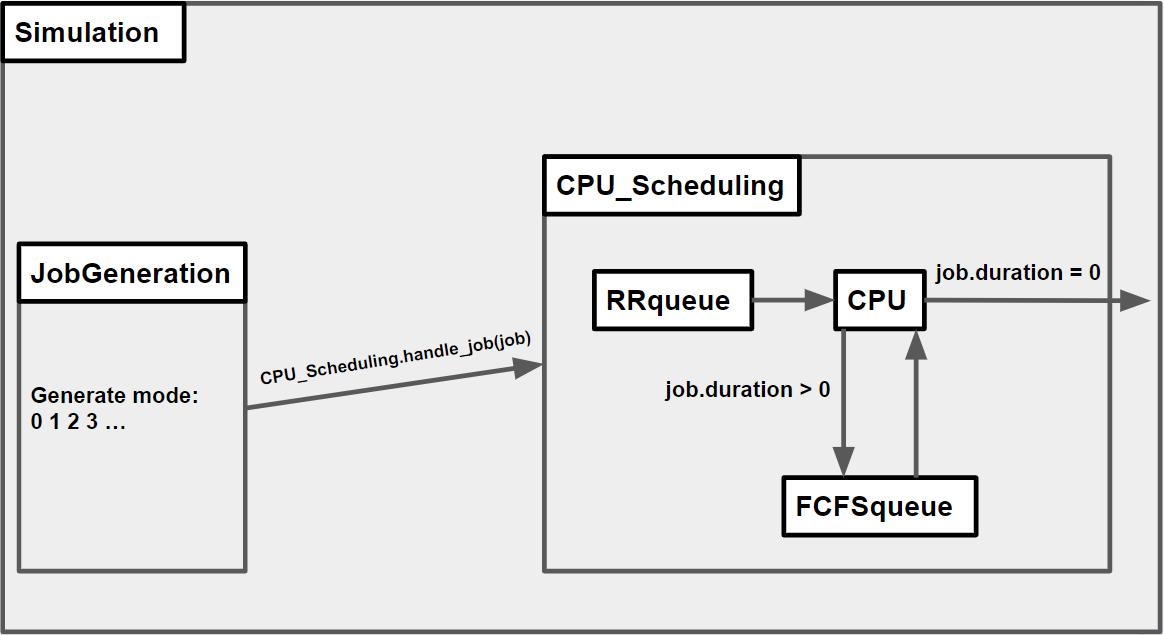

## 7. Begin Simulation

### INSTALL SUPPORTED LIBRARY

In [418]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install simpy

### IMPORT INSTALL LIBRARY

In [419]:
import simpy
import numpy.random as random
import math
import pandas as pd
import matplotlib.pyplot as plt
import os

### INITIAL PARAMETERS

Initial parameters are used for specific simulation below. These parameters can be changed. However, in this report, only the Generated Mode are changed for observation. The default mode for simulation will be 4. For later on and further research, remaining parameters will be changed. 

In [420]:
LAMBDA = 10 # ARRIVAL RATE
MU = 20 # SERVICE RATE
QUANTUM_TIME = 10 
GENERATE_MODE = 4

### FORMAT FILE PATH

File path will be changed for each generated mode.

In [421]:
path_file = "./output/mode{}".format(GENERATE_MODE)
log_file = open("{}/log.txt".format(path_file), "w")
queue_file = open("{}/queue.txt".format(path_file), "w")

stat_file = "{}/stat.csv".format(path_file)
FCFSQueue_file = "{}/FCFSQueue.csv".format(path_file)
RRQueue_file = "{}/RRQueue.csv".format(path_file)


### CREATE STATISTIC FILES FOR OBSERVATION AND PLOTTING

In [422]:
open(stat_file, 'w').close()
open(RRQueue_file, 'w').close()
open(FCFSQueue_file, 'w').close()

RR_time_stat_file = "{}/RR_time_stat_{}.csv".format(path_file, GENERATE_MODE)
FCFS_time_stat_file = "{}/FCFS_time_stat_{}.csv".format(path_file, GENERATE_MODE)
#CREATE TIME STATISTICS FILE IF NOT EXIST
if not os.path.exists(str(RR_time_stat_file)):
    open(RR_time_stat_file, 'w').close()
    
if not os.path.exists(str(FCFS_time_stat_file)):
    open(FCFS_time_stat_file, 'w').close()

### FUNCTION FOR IMPLEMENTATION

#### WRITE FILE FUNCTION

In [451]:
def write_to_file(path_to_file, time, who, msg):
    path_to_file.write("{}:{}{}:{}{}\n".format(time, " " * (10 - len(str(time))), who, " " * (20 - len(who)), msg))
    path_to_file.write("\n")

In [452]:
def write_queue_to_file(path_to_file, time, which, queue):
    path_to_file.write("{}:{}{}: ".format(time, " " * (10 - len(str(time))), which, " " * (20 - len(which))))
    for job in queue:
        path_to_file.write(str(job.id) + " ")
    path_to_file.write("\n")

In [449]:
def write_statistic_to_file(path_to_file, job):
    process = [job.id]
    arr_time = [job.arrival_time]
    saved_burst_time = [job.saved_burst_time]
    turn_arround_time = [job.turn_around_time]
    response_time = [job.response_time]
    waiting_time = [job.waiting_time]
    
    df = pd.DataFrame(data={"process": process, 
                            "arrival": arr_time, 
                            "burst_time": saved_burst_time, 
                            "turn_arround": turn_arround_time, 
                            "response_time": response_time, 
                            "waiting_time": waiting_time})
    with open(path_to_file) as f:
        line = f.readlines()
        f.close()
    if len(line) > 0:
        df.to_csv(path_to_file, mode ='a', index = False, header= False)
    else:
        df.to_csv(path_to_file, mode ='a', index = False, header= True)

In [450]:
def write_job_in_queue(path_to_file, time, numberOfprocess):
    time = [time]
    number = [numberOfprocess]
    
    df = pd.DataFrame(data ={"time": time,
                             "Amount": number})
    with open(path_to_file) as f:
        line = f.readlines()
        f.close()
    if len(line) > 0:
        df.to_csv(path_to_file, mode ='a', index = False, header= False)
    else:
        df.to_csv(path_to_file, mode ='a', index = False, header= True)

#### DELETE CSV FUNCTION - AVOIDING OVERWRITE

In [426]:
def deleteCSV():
    if os.path.exists(str(stat_file)):
        os.remove(str(stat_file))
        print("Delete {}".format(str(stat_file)))
    else:
        print("{} does not exist".format(str(stat_file)))

    if os.path.exists(str(FCFSQueue_file)):
        os.remove(str(FCFSQueue_file))
        print("Delete {}".format(str(FCFSQueue_file)))
    else:
        print("{} does not exist".format(str(FCFSQueue_file)))

    if os.path.exists(str(RRQueue_file)):
        os.remove(str(RRQueue_file))
        print("Delete {}".format(str(RRQueue_file)))
    else:
        print("{} does not exist".format(str(RRQueue_file)))

### CLASS FOR IMPLEMENTATION

In [453]:
class Job:
    def __init__(self, id, arrival_time, burst_time, priority):
        self.id = id
        self.arrival_time = arrival_time
        self.last_time_in_CPU = arrival_time
        self.saved_burst_time = burst_time
        self.burst_time = burst_time
        self.priority = priority
        self.turn_around_time = 0
        self.waiting_time = 0
        self.response_time = -1

In [454]:
class JobGenerator:
    def __init__(self, env):
        self.env = env
        self.inter_arrivaltime = 1 / LAMBDA
        self.service_time = 1 / MU

    def generate_job(self, mode, cpu_scheduling):
        i = 0
        while True:
            # MODE 0 - EVEN PROCESSES GO TO FCFS QUEUE, ODD PROCESSES GO TO RR
            if mode == 0:
                yield self.env.timeout(9)
                if i % 2 == 0:
                    cpu_scheduling.handle_arrival_job(Job(i, self.env.now, 10, 0))
                else:
                    cpu_scheduling.handle_arrival_job(Job(i, self.env.now, 10, 1))
                i += 1
                
           # MODE 1,2,3 - ADD PROCRESSES TO RR QUEUE, CHANGING BURST TIME FOR OBSERVATION 
            elif mode == 1:
                yield self.env.timeout(15)
                cpu_scheduling.handle_arrival_job(Job(i, self.env.now, 10, 0))
                i += 1
            elif mode == 2:
                yield self.env.timeout(15)
                cpu_scheduling.handle_arrival_job(Job(i, self.env.now, 15, 0))
                i += 1
            elif mode == 3:
                yield self.env.timeout(15)
                cpu_scheduling.handle_arrival_job(Job(i, self.env.now, 20, 0))
                i += 1
                
            # MODE 4 - ADD PROCRESSES WITH RANDOM DURATION AND RANDOM PRIORITY
            elif mode == 4:
                job_interarrival = math.trunc(random.exponential(self.inter_arrivaltime) * 100)
                yield env.timeout(job_interarrival)
                job_duration = math.trunc(random.exponential(self.service_time) * 100) + 1
                priority = random.randint(0, 2)
                cpu_scheduling.handle_arrival_job(Job(i, self.env.now, job_duration, priority))
                i += 1
                
            # MODE 5 -
            elif mode == 5:
                max_long_job = random.randint(3,5)
                n = 0
                while (n < max_long_job): 
                    job_interarrival = math.trunc(random.exponential(self.inter_arrivaltime) *100)
                    yield env.timeout(job_interarrival)
                    job_duration = math.trunc(random.exponential(self.service_time) * 100) + 1 
                    priority = 1
                    cpu_scheduling.handle_arrival_job(Job(i, self.env.now, job_duration, priority))
                    i += 1
                    n += 1
                job_interarrival = math.trunc(random.exponential(self.inter_arrivaltime) *100)
                job_duration = math.trunc(random.exponential(self.service_time)*100) + 0.5
                priority = 0
                cpu_scheduling.handle_arrival_job(Job(i, self.env.now, job_duration, priority))
                i += 1
                
            # MODE 6 - ADDING PROCESS TO FCFS QUEUE WITHOUT RR QUEUE
            elif mode == 6:
                yield self.env.timeout(15)
                cpu_scheduling.handle_arrival_job(Job(i, self.env.now, 30, 1))
                i += 1
                
            # MODE 7
            elif mode == 7:
                job_interarrival = math.trunc(random.exponential(self.inter_arrivaltime) *200)
                yield env.timeout(job_interarrival)
                job_duration = math.trunc(random.exponential(self.service_time) * 200) + 3
                priority = 1
                cpu_scheduling.handle_arrival_job(Job(i, self.env.now, job_duration, priority))
                i += 1
                max_long_job = random.randint(3,7)
                n = 0
                while (n < max_long_job): 
                    job_interarrival = math.trunc(random.exponential(self.inter_arrivaltime) *200)
                    job_duration = math.trunc(random.exponential(self.service_time)*200) + 0.25
                    priority = 0
                    cpu_scheduling.handle_arrival_job(Job(i, self.env.now, job_duration, priority))
                    i += 1
                    n += 1
                

In [455]:
class CPU:
    def __init__(self, env):
        self.env = env
        self.job_arrival_interrupt = env.event()
        self.idle_time = 0

    def serve(self, time, job):
        write_to_file(log_file, self.env.now, "CPU", "CPU is GIVEN TO process {}".format(job.id))
        try:
            yield self.env.timeout(time)
        except simpy.Interrupt as i:
            print("Interrupt: " + i.cause)
        write_to_file(log_file, self.env.now, "CPU", "Process {} LEAVE the CPU".format(job.id))
        job.last_time_in_CPU = self.env.now

    def idle(self):
        # print("{} cpu is idle".format(self.env.now))
        write_to_file(log_file, self.env.now, "CPU", "CPU is IDLE")
        t1 = self.env.now
        yield self.job_arrival_interrupt
        self.idle_time += (self.env.now - t1)

In [456]:
class CpuScheduling:
    def __init__(self, env, quantum_time=5):
        self.env = env
        self.quantum_time = quantum_time
        self.RR_queue = []
        self.FCFS_queue = []
        self.CPU = CPU(self.env)

    def handle_arrival_job(self, job):
        if job.priority == 0:
            # print("{}: Receive 1 job with priority 0".format(self.env.now))
            '''put this job to RR queue'''
            write_to_file(log_file, self.env.now, "RR queue", "Process {} burst time {} to RR queue".format(job.id, job.burst_time))
            self.RR_queue.append(job)
            write_queue_to_file(queue_file, self.env.now, "RR queue", self.RR_queue)
            write_job_in_queue(RRQueue_file, self.env.now, len(self.RR_queue))
        elif job.priority == 1:
            # print("{}: Receive 1 job with priority 1".format(self.env.now))
            '''put this job to FCFS queue'''
            write_to_file(log_file, self.env.now, "FCFS queue", "Process {} burst time {} to FCFS queue".format(job.id, job.burst_time))
            self.FCFS_queue.append(job)
            write_queue_to_file(queue_file, self.env.now, "FCFS queue", self.FCFS_queue)
            write_job_in_queue(FCFSQueue_file, self.env.now, len(self.FCFS_queue))

        self.CPU.job_arrival_interrupt.succeed()
        self.CPU.job_arrival_interrupt = self.env.event()

    def schedule(self):
        while True:
            '''check if there are any processes are waiting to be executed'''
            if (len(self.RR_queue) != 0) or (len(self.FCFS_queue) != 0):

                '''Execute all processes in RR queue'''
                while len(self.RR_queue) != 0:
                    write_queue_to_file(queue_file, self.env.now, "RR queue", self.RR_queue)
                    '''Get the process of out the queue'''
                    my_job = self.RR_queue.pop(0)
                    write_job_in_queue(RRQueue_file, self.env.now, len(self.RR_queue))

                    '''Calculate statistics of the process'''
                    if my_job.response_time == -1:
                        my_job.response_time = self.env.now - my_job.arrival_time
                    my_job.waiting_time += (self.env.now - my_job.last_time_in_CPU)

                    '''calculate duration for this process in RR algorithm'''
                    duration = min(self.quantum_time, my_job.burst_time)
                    yield self.env.process(self.CPU.serve(duration, my_job))
                    my_job.burst_time -= duration

                    '''Check if the process finishes or not'''
                    if my_job.burst_time > 0:
                        my_job.priority += 1
                        self.FCFS_queue.append(my_job)
                        write_to_file(log_file, self.env.now, "FCFS queue", "Process {} burst time {} to FCFS queue".format(my_job.id, my_job.burst_time))
                        write_queue_to_file(queue_file, self.env.now, "FCFS queue", self.FCFS_queue)
                        write_job_in_queue(FCFSQueue_file, self.env.now, len(self.FCFS_queue))
                    else:
                        '''Yes, this process finish. We calculate some other statistics'''
                        my_job.turn_around_time = self.env.now - my_job.arrival_time
                        assert my_job.turn_around_time == my_job.saved_burst_time + my_job.waiting_time
                        write_statistic_to_file(stat_file, my_job)

                ''' Execuet all process in FCFS queue'''
                while len(self.FCFS_queue) != 0:
                    write_queue_to_file(queue_file, self.env.now, "FCFS queue", self.FCFS_queue)
                    '''Get the process of out the queue'''
                    my_job = self.FCFS_queue.pop(0)
                    write_job_in_queue(FCFSQueue_file, self.env.now, len(self.FCFS_queue))

                    '''Calculate some statistics of the process'''
                    if my_job.response_time == -1:
                        my_job.response_time = self.env.now - my_job.arrival_time
                    my_job.waiting_time += (self.env.now - my_job.last_time_in_CPU)

                    '''In process with lower priority could be preempted by higher priority process'''
                    t1 = self.env.now
                    serve_proc = self.env.process(self.CPU.serve(my_job.burst_time, my_job))

                    '''wait for the process to finish or there is interrupt because
                       there is higher priority process comes'''
                    results = yield serve_proc | self.CPU.job_arrival_interrupt

                    '''Check if our process completely finishes or be interrupted by higher priority process'''
                    if serve_proc not in results:
                        serve_proc.interrupt("Higher priority process comes!")
                        interval = self.env.now - t1
                        my_job.burst_time -= interval

                        '''put the interrupted process back into FCFS queue and break'''
                        self.FCFS_queue.append(my_job)
                        write_to_file(log_file, self.env.now, "FCFS queue", "Process {} burst time {} to FCFS queue".format(my_job.id, my_job.burst_time))
                        write_queue_to_file(queue_file, self.env.now, "FCFS queue", self.FCFS_queue)
                        write_job_in_queue(FCFSQueue_file, self.env.now, len(self.FCFS_queue))
                        break
                    else:
                        '''there is no process with higher priority comes and the process completely finish.
                            We calculate some statistics for this process'''
                        my_job.turn_around_time = self.env.now - my_job.arrival_time
                        assert my_job.turn_around_time == my_job.saved_burst_time + my_job.waiting_time
                        write_statistic_to_file(stat_file, my_job)
            else:
                '''No process wait, therefore the CPU will go to IDLE state'''
                yield self.env.process(self.CPU.idle())

In [457]:
class Simulation:
    def __init__(self, env):
        self.my_job_generator = JobGenerator(env)
        self.my_cpu_scheduling = CpuScheduling(env, QUANTUM_TIME)

    def simulate(self):
        env.process(self.my_job_generator.generate_job(GENERATE_MODE, self.my_cpu_scheduling))
        env.process(self.my_cpu_scheduling.schedule())

### BEGIN SIMULATION

In [434]:

print(path_file)

env = simpy.Environment()
sim = Simulation(env)
sim.simulate()
env.run(until=1000)


./output/mode4
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!
Interrupt: Higher priority process comes!


### BEGIN PLOTTING 

In [458]:
with open(FCFSQueue_file) as f:
    line = f.readlines()
    f.close()
if len(line) > 0:
    FCFS_df = pd.read_csv(FCFSQueue_file)
    haveFCFS = 1
    print(FCFS_df.describe())
else:
    haveFCFS = 0
    print("First Come First Serve Queue file empty")



             time      Amount
count  138.000000  138.000000
mean   511.311594    1.181159
std    322.852361    1.268573
min     11.000000    0.000000
25%    215.000000    0.000000
50%    537.000000    1.000000
75%    852.500000    2.000000
max    986.000000    6.000000


In [459]:
with open(RRQueue_file) as f:
    line = f.readlines()
    f.close()
if len(line) > 0:
    RR_df = pd.read_csv(RRQueue_file)
    haveRR = 1
    print(RR_df.describe())
else:
    haveRR = 0
    print("Round Robin Queue file empty")


             time      Amount
count  106.000000  106.000000
mean   422.867925    0.575472
std    289.476903    0.568174
min      9.000000    0.000000
25%    151.000000    0.000000
50%    421.000000    1.000000
75%    641.000000    1.000000
max    976.000000    2.000000


### NUMBER OF PROCESS IN QUEUE PLOTTING

Ploting with Round Robin Data and FCFS Data


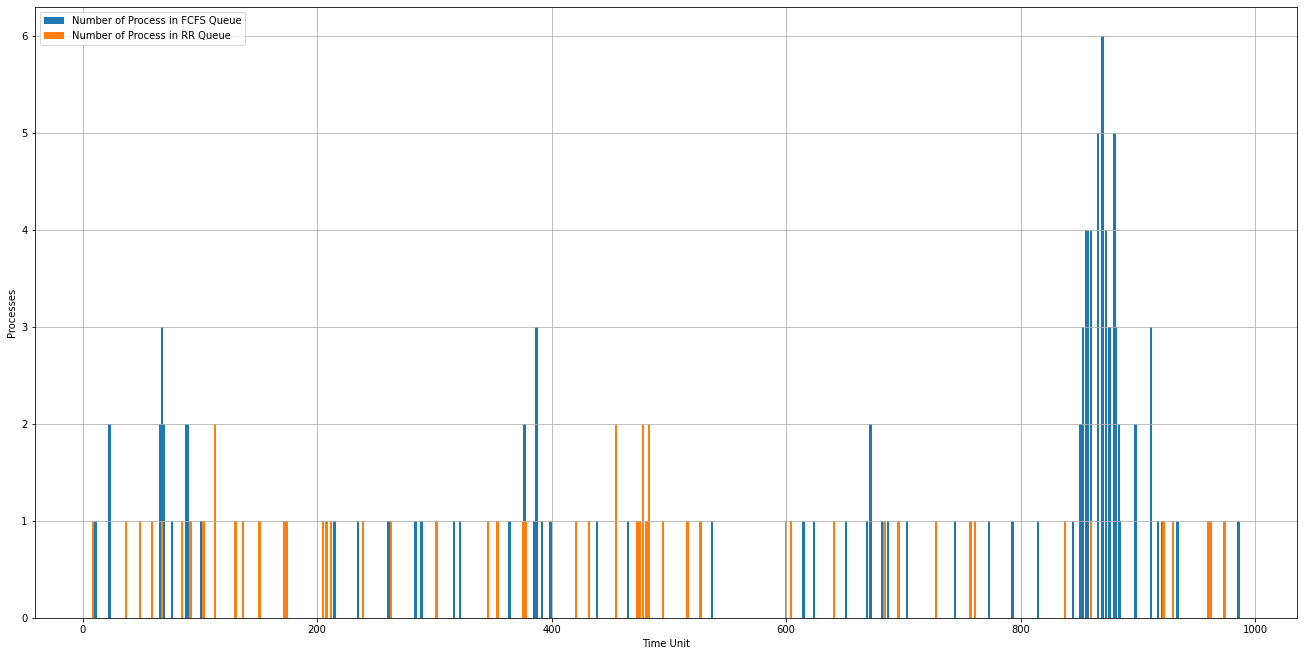

In [460]:
if haveRR and haveFCFS:
    print("Ploting with Round Robin Data and FCFS Data")
    plt.figure(figsize=(18,9), layout='constrained')
    plt.bar(FCFS_df["time"], FCFS_df["Amount"], label='Number of Process in FCFS Queue', width = 2)
    plt.bar(RR_df["time"], RR_df["Amount"], label='Number of Process in RR Queue', width = 2)
    plt.xlabel("Time Unit")
    plt.ylabel("Processes")
    plt.grid(True)
    plt.legend()
    plt.savefig("{}/stat_barplot_mode{}.png".format(path_file, GENERATE_MODE))
elif haveRR and not haveFCFS:
    print("Ploting with Round Robin Data")
    plt.figure(figsize=(18,9), layout='constrained')
    plt.bar(RR_df["time"], RR_df["Amount"], label='Number of Process in FCFS Queue', width = 2)
    plt.xlabel("Time Unit")
    plt.ylabel("Processes")
    plt.grid(True)
    plt.legend()
    plt.savefig("{}/stat_barplot_mode{}.png".format(path_file, GENERATE_MODE))
elif haveFCFS and not haveRR:
    print("Ploting with First Come First Serve Data")
    plt.figure(figsize=(18,9), layout='constrained')
    plt.bar(FCFS_df["time"], FCFS_df["Amount"], label='Number of Process in FCFS Queue', width = 2)
    plt.xlabel("Time Unit")
    plt.ylabel("Processes")
    plt.grid(True)
    plt.legend()
    plt.savefig("{}/stat_barplot_mode{}.png".format(path_file, GENERATE_MODE))
else: print("Both files empty")

### FREQUENCY OF NUMBER OF PROCESS IN QUEUE PLOTTING 

Ploting with Round Robin Data and FCFS Data


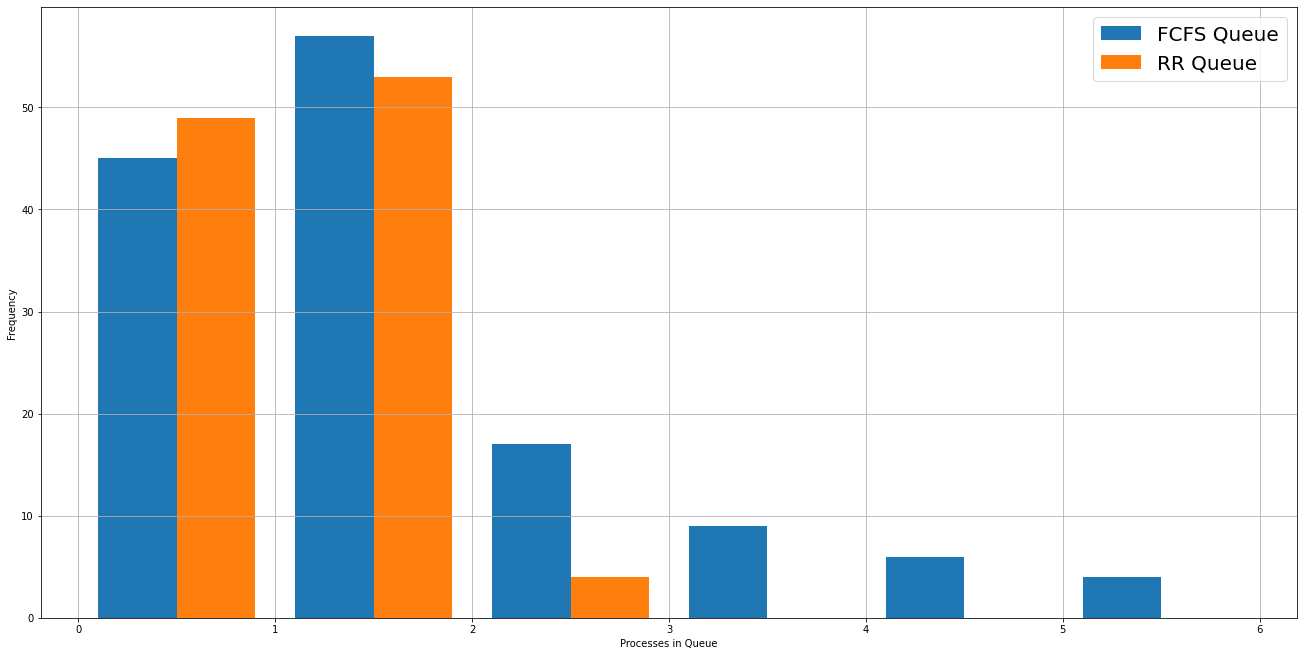

In [461]:
if haveRR and haveFCFS:
    print("Ploting with Round Robin Data and FCFS Data")
    if (FCFS_df["Amount"].nunique() > RR_df["Amount"].nunique()):
        bin_value = FCFS_df["Amount"].nunique() - 1
    else:
        bin_value = RR_df["Amount"].nunique() -1

    plt.figure(figsize=(18,9), layout='constrained')
    plt.hist([FCFS_df["Amount"], RR_df["Amount"]], bins = bin_value, label = ["FCFS Queue", "RR Queue"])
    plt.xlabel("Processes in Queue")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.legend(prop ={'size': 20})
    plt.savefig("{}/stat_histplot_mode{}.png".format(path_file, GENERATE_MODE))
elif haveRR and not haveFCFS:
    print("Ploting with Round Robin Data")
    bin_value = RR_df["Amount"].nunique() -1
    plt.figure(figsize=(18,9), layout='constrained')
    plt.hist(RR_df["Amount"], bins = bin_value, label = "RR Queue")
    plt.xlabel("Processes in Queue")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.legend(prop ={'size': 20})
    plt.savefig("{}/stat_histplot_mode{}.png".format(path_file, GENERATE_MODE))
elif haveFCFS and not haveRR:
    print("Ploting with First Come First Serve Data")
    bin_value = FCFS_df["Amount"].nunique() -1
    plt.figure(figsize=(18,9), layout='constrained')
    plt.hist(FCFS_df["Amount"], bins = bin_value, label = "FCFS Queue")
    plt.xlabel("Processes in Queue")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.legend(prop ={'size': 20})
    plt.savefig("{}/stat_histplot_mode{}.png".format(path_file, GENERATE_MODE))
else: print("Both files empty")
    



### DELETE CSV IF NECESSARY

In [462]:
# deleteCSV()

## 7. Evaluation